<a href="https://colab.research.google.com/github/Ananthucsajayan/Machine-learning-ICT/blob/main/linear_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# import pandas
import pandas as pd
import numpy as np

In [19]:
from google.colab import files
files.upload()

Saving Housing.csv to Housing (3).csv


{'Housing (3).csv': b'price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus\r\n13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished\r\n12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished\r\n12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished\r\n12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished\r\n11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished\r\n10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished\r\n10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished\r\n10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished\r\n9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished\r\n9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished\r\n9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished\r\n9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished\r\n9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished\r\n9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished\r\n9240000,7800,3,2,2,yes,no,no,n

In [41]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('Housing.csv')

# display the first 5 rows
data.head(10)
coldata = data.columns
print(coldata)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [42]:
data.drop(['mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],axis=1,inplace=True)

Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [43]:
# display the last 5 rows
data.tail()

,price,area,bedrooms,bathrooms,stories
540,1820000,3000,2,1,1
541,1767150,2400,3,1,1
542,1750000,3620,2,1,1
543,1750000,2910,3,1,1
544,1750000,3850,3,1,2


In [44]:
# check the shape of the DataFrame (rows, columns)
data.shape

(545, 5)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data


In [45]:
# conventional way to import seaborn
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

<Axes: xlabel='bathrooms', ylabel='price'>

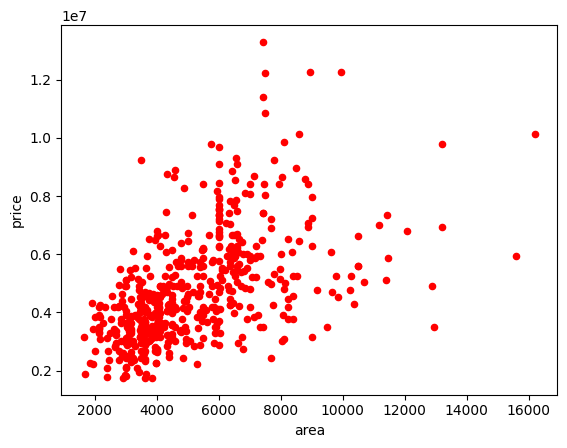

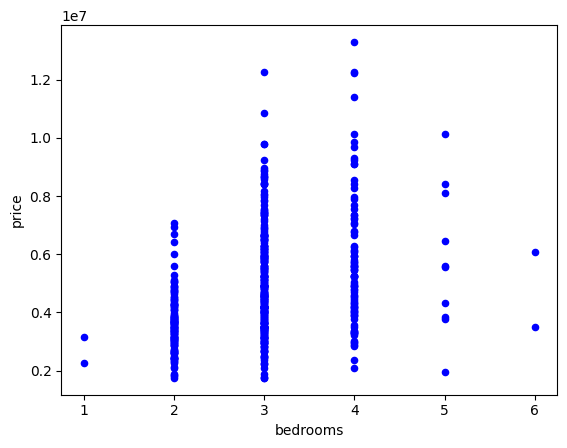

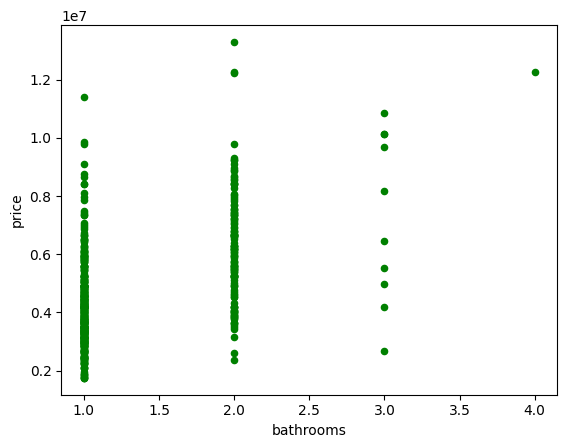

In [46]:
data.plot(kind='scatter',x='area',y='price',color='red')
data.plot(kind='scatter',x='bedrooms',y='price',color='blue')
data.plot(kind='scatter',x='bathrooms',y='price',color='green')

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [47]:
# create a Python list of feature names
feature_cols = ['area', 'bedrooms', 'bathrooms', 'stories']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['area', 'bedrooms', 'bathrooms', 'stories']]

# print the first 5 rows
X.head()


,area,bedrooms,bathrooms,stories
0,7420,4,2,3
1,8960,4,4,4
2,9960,3,2,2
3,7500,4,2,2
4,7420,4,1,2


In [48]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(545, 4)


In [49]:
# select a Series from the DataFrame
lab = ['price']

# equivalent command that works if there are no spaces in the column name
y =  data['price']



# print the first 5 values
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [50]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(545,)


## Splitting X and y into training and testing sets

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [52]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# X_train = X_train[:150]

print(X_test)

(408, 4)
(408,)
(137, 4)
(137,)
      area  bedrooms  bathrooms  stories
62    6240         4          2        2
247   8400         4          1        4
142  10500         4          2        2
107   6420         3          1        3
483   6615         3          1        2
..     ...       ...        ...      ...
246   3520         3          1        1
436   2145         3          1        2
110   6600         3          1        1
396   3640         2          1        1
446   3986         2          2        1

[137 rows x 4 columns]


## Linear regression in scikit-learn

In [54]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
model = linreg.fit(X_train, y_train)



### Making predictions

In [55]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print(y_pred)

[6294430.2957738  6851055.0662962  7803491.63517324 5480205.855478
 5004319.6376927  3266832.28455562 3139305.97418384 6088931.97990058
 2948016.50862617 4432222.43977484 3599759.02484792 4477010.03032917
 4906337.45880497 4096202.29796899 6142165.8285082  7257396.1712291
 3507715.31525788 4117007.68703418 6421956.60614558 3284190.03235623
 3748032.09860642 5907801.34547287 6543832.04122333 3787506.09289526
 5110254.28397398 5636637.59328612 3054288.43393598 7105131.70396351
 7086287.22170443 3965830.91981307 7302373.46983439 7360823.02875479
 4650250.22930667 4733326.22815266 6171681.84949389 3553200.23553841
 5851630.60698288 2942348.67260964 5048033.35921807 4900173.15088908
 5087507.35350691 3893778.01820508 3798133.28542625 4539001.9867599
 5333006.65074847 3532512.09783017 4063871.72437927 3553766.48289214
 2877168.55841962 4024846.72608719 5085965.12307693 3781129.77737667
 3231408.30945235 3653461.23485655 4272873.17748858 4435764.83728516
 3599251.40317267 4403883.25969222 344

We need an **evaluation metric** in order to compare our predictions with the actual values!